# ClimAgro Assignment NEELIMA DIXIT 231140014

import netCDF4" imports the netCDF4 library in Python, allowing access to functions and classes for working with NetCDF 
(Network Common Data Form) files, a format commonly used in atmospheric and oceanographic sciences for storing multidimensional 
scientific data.

In [92]:
import netCDF4
import numpy as np
import pandas as df

In [93]:
nc_file_1992 = netCDF4.Dataset('tmax.1992.nc', mode='r')
nc_file_1993 = netCDF4.Dataset('tmax.1993.nc', mode='r')
nc_file_1996 = netCDF4.Dataset('tmax.1996.nc', mode='r')
nc_file_1997 = netCDF4.Dataset('tmax.1997.nc', mode='r')
nc_file_2000 = netCDF4.Dataset('tmax.2000.nc', mode='r')
nc_file_2002 = netCDF4.Dataset('tmax.2002.nc', mode='r')
nc_file_2003 = netCDF4.Dataset('tmax.2003.nc', mode='r')
nc_file_2004 = netCDF4.Dataset('tmax.2004.nc', mode='r')

This data resembles panel data, where it's organized as a matrix with latitudes (360) and longitudes (720) representing cross-sections for every year. In this, there are three features: latitude, longitude, and time. The total dimension of the dataset is 360 * 720 * 2924. we have data of 8 year.

In [94]:
print(nc_file_1992)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    version: V1.0
    history: created 9/2016 by CAS NOAA/ESRL PSD
    title: CPC GLOBAL TEMP V1.0
    dataset_title: CPC GLOBAL TEMP
    Source: ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References: https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp.html
    dimensions(sizes): lat(360), lon(720), time(366)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 tmax(time, lat, lon)
    groups: 


In [95]:
tmax_1992 = nc_file_1992.variables['tmax']
tmax_1993 = nc_file_1993.variables['tmax']
tmax_1996 = nc_file_1996.variables['tmax']
tmax_1997 = nc_file_1997.variables['tmax']
tmax_2000 = nc_file_2000.variables['tmax']
tmax_2002 = nc_file_2002.variables['tmax']
tmax_2003 = nc_file_2003.variables['tmax']
tmax_2004 = nc_file_2004.variables['tmax']


tmax_dataset = np.concatenate((tmax_1992, tmax_1993, tmax_1996, tmax_1997, tmax_2000, tmax_2002, tmax_2003, tmax_2004), axis=0)

# Print the shape of the concatenated array to verify it's 4-dimensional
print("Shape of the concatenated array:", tmax_dataset.shape)


Shape of the concatenated array: (2924, 360, 720)


In [96]:
lat = nc_file_2004.variables['lat']
lon = nc_file_2004.variables['lon']

lat = np.array(lat)
lon = np.array(lon)

# Prayagraj
The latitude and longitude of Prayagraj, also known as Allahabad, are approximately:

- Latitude: 25.42° N
- Longitude: 81.88385° E

In [97]:
Location_lat = 25.42

In [98]:
# Calculate the absolute differences between each element and the target value
absolute_diff = np.abs(lat - Location_lat)

# Find the index of the minimum absolute difference
index_lat = np.argmin(absolute_diff)

# Print the index of the closest value
print("Index of the closest value:", index_lat)


Index of the closest value: 129


In [99]:
Location_lon = 81.88385000

In [100]:
# Calculate the absolute differences between each element and the target value
absolute_diff = np.abs(lon - Location_lon)

# Find the index of the minimum absolute difference
index_lon = np.argmin(absolute_diff)

# Print the index of the closest value
print("Index of the closest value:", index_lon)

Index of the closest value: 163


These are the locations of prayagraj district in a 360x720 matrix of latitude and longitude data 

# TASK 1.1 FOR YEAR 1992 

QUES: Extract the daily maximum temperatures for the months of June, July, August, and
      September for your home district during each year (1979-2021).


In [101]:
# Define the number of days in each month
days_in_month = {
    "January": 31,
    "February": 29,
    "March": 31,
    "April": 30,
    "May": 31,
    "June": 30,
    "July": 31,
    "August": 31,
    "September": 30,
    "October": 31,
    "November": 30,
    "December": 31
}

# Calculate the cumulative days up to the end of each month
cumulative_days = {}
total_days = -1
for month, days in days_in_month.items():
    total_days += days
    cumulative_days[month] = total_days

# Print the day numbers for June, July, August, and September
may_days = cumulative_days["May"]
june_days = cumulative_days["June"]
july_days = cumulative_days["July"]
august_days = cumulative_days["August"]
september_days = cumulative_days["September"]

print("may days:", may_days)
print("June days:", june_days)
print("July days:", july_days)
print("August days:", august_days)
print("September days:", september_days)


may days: 151
June days: 181
July days: 212
August days: 243
September days: 273


We determine the index of the last day of each month as follows: 151 corresponds to the 31st of May, 181 corresponds to the 30th of June, 212 corresponds to the 31st of July, 243 corresponds to the 31st of August, and 273 corresponds to the 30th of September. To retrieve the maximum temperature for a specific month, we utilize the syntax [start day index : end day index + 1].

In [102]:
tmax_june = tmax_1992[152:182,129,163]
tmax_july = tmax_1992[182:213,129,163]
tmax_august = tmax_1992[213:244,129,163]
tmax_sept = tmax_1992[244:274,129,163]

In [103]:
print(tmax_june)

[42.75786  43.304    44.924126 37.9006   45.017277 46.415993 45.975334
 39.78711  40.486378 35.647472 37.621136 39.851543 34.41306  39.744183
 41.51363  40.844612 40.377037 37.934715 34.1159   37.647766 35.467262
 36.556683 40.55814  39.200226 40.621906 38.492992 36.325333 39.675365
 42.673447 39.58085 ]


In [104]:
print(tmax_july)

[38.56327438354492 40.95872116088867 34.600799560546875 40.38294219970703
 42.79317092895508 41.303932189941406 43.139305114746094
 38.097511291503906 35.801082611083984 36.421539306640625
 38.346195220947266 32.25922393798828 34.04000473022461 34.63505935668945
 35.313236236572266 32.11768341064453 32.24725341796875 33.192665100097656
 33.29170227050781 34.976619720458984 27.274986267089844
 29.016714096069336 33.842525482177734 34.17700958251953
 32.078739166259766 33.79004669189453 31.87641716003418 28.901058197021484
 32.45358657836914 33.83070373535156 --]


In [105]:
print(tmax_august)

[28.96558  31.690416 32.163826 33.585308 34.292522 33.086216 28.503513
 30.974766 31.030193 33.087383 34.072662 35.496826 34.11361  36.49132
 31.951473 32.21148  33.520084 32.43468  33.552113 32.61166  33.48816
 34.52491  35.63499  33.98177  30.006891 31.25771  32.503002 31.955757
 30.994682 34.356827 36.41724 ]


In [106]:
print(tmax_sept)

[34.690525 36.402184 34.712364 31.309834 32.590427 33.67145  35.101486
 33.6088   32.808292 31.612917 32.228085 30.192312 29.582943 29.231043
 32.708237 32.64727  32.24594  33.267548 33.762093 34.171055 33.93566
 34.18643  34.502552 34.14984  34.948963 34.749744 35.200825 35.44663
 33.475693 35.39666 ]


above cells mantioned maximum temprature readings in days of that month

In [107]:
average_max_tem_june = np.mean(tmax_june)

print("Average max temp for june:", average_max_tem_june)

Average max temp for june: 39.847733


In [108]:
average_max_tem_july = np.mean(tmax_july)

print("Average max temp for july:", average_max_tem_july)

Average max temp for july: 34.99079182942708


In [109]:
average_max_tem_august = np.mean(tmax_august)

print("Average max temp for august:", average_max_tem_august)

Average max temp for august: 32.8696


In [110]:
average_max_tem_sept = np.mean(tmax_sept)

print("Average max temp for september:", average_max_tem_sept)

Average max temp for september: 33.417927


# TASK 1.2 FOR YEAR 1992 

QUES: Calculate the average maximum temperature for each of these summer months across all
      years.

In [111]:
tmax_january = tmax_1992[0:31, 129, 163]
tmax_february = tmax_1992[31:60, 129, 163]
tmax_march = tmax_1992[60:91, 129, 163]
tmax_april = tmax_1992[91:121, 129, 163]
tmax_may = tmax_1992[121:152, 129, 163]
tmax_june = tmax_1992[152:182, 129, 163]
tmax_july = tmax_1992[182:213, 129, 163]
tmax_august = tmax_1992[213:244, 129, 163]
tmax_september = tmax_1992[244:274, 129, 163]
tmax_october = tmax_1992[274:305, 129, 163]
tmax_november = tmax_1992[305:335, 129, 163]
tmax_december = tmax_1992[335:, 129, 163]

In [112]:
# Calculate the averages for each month
avg_tmax_january = np.mean(tmax_january)
avg_tmax_february = np.mean(tmax_february)
avg_tmax_march = np.mean(tmax_march)
avg_tmax_april = np.mean(tmax_april)
avg_tmax_may = np.mean(tmax_may)
avg_tmax_june = np.mean(tmax_june)
avg_tmax_july = np.mean(tmax_july)
avg_tmax_august = np.mean(tmax_august)
avg_tmax_september = np.mean(tmax_september)
avg_tmax_october = np.mean(tmax_october)
avg_tmax_november = np.mean(tmax_november)
avg_tmax_december = np.mean(tmax_december)

# Store the averages in an array
avg_tmax_monthly = np.array([avg_tmax_january, avg_tmax_february, avg_tmax_march, avg_tmax_april, avg_tmax_may, avg_tmax_june, avg_tmax_july, avg_tmax_august, avg_tmax_september, avg_tmax_october, avg_tmax_november, avg_tmax_december])

print(avg_tmax_monthly)



[24.22431374 26.26104927 33.75291061 39.75181961 41.06139755 39.84773254
 34.99079183 32.86959839 33.41792679 32.5151329  28.67870903 23.94316864]


# TASK 1.3 FOR YEAR 1992 

QUES: Create a separate time series plot showing the average maximum temperatures for each
      month over the years.
      

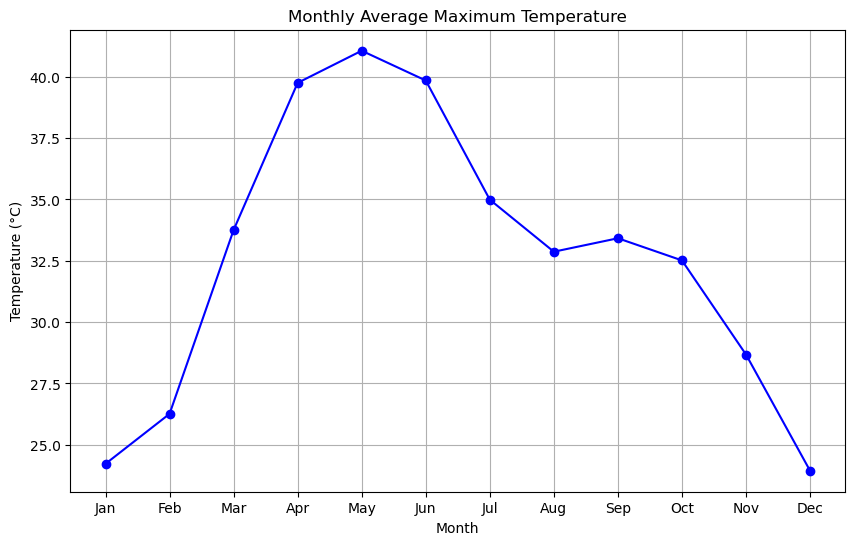

In [113]:
import matplotlib.pyplot as plt

# Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(months, avg_tmax_monthly, marker='o', color='b', linestyle='-')
plt.title('Monthly Average Maximum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


From the above data plot, it's evident that the average highest temperatures occur in May, while January and December emerge as the coldest months. 

# TASK 2.1 FOR YEAR 1992

QUES: Estimate the number of hot days (days with tmax > 38°C) and the average tmax in the whole summer season (June-September)         for each year and present it with appropriate visualization.


In [114]:
# Assuming tmax is your array
# Count values greater than 38

count_greater_than_38 = np.sum(tmax_1992[152:274, 129, 163] > 38)

print("Count of values greater than 38:", count_greater_than_38)


Count of values greater than 38: 28


In [115]:
summer_days = tmax_1992[152:274, 129, 163]
# Find the average overall
avg_summer = np.mean(summer_days)

print("Average temperature for summer:", avg_summer)


Average temperature for summer: 35.2615775116219


For year 1992 the average temprature of summer is 35.2615775116219 

# TASK 2.2 FOR YEAR 1992

In [116]:
# X = Record hot days in June, July, August, and September
count = []

# Append the count of hot days for each month to the count list
count.append(np.sum(tmax_1992[152:182, 129, 163] > 38))  # June
count.append(np.sum(tmax_1992[182:213, 129, 163] > 38))  # July
count.append(np.sum(tmax_1992[213:244, 129, 163] > 38))  # August
count.append(np.sum(tmax_1992[244:274, 129, 163] > 38))  # September

print(count)

[20, 8, 0, 0]


In [117]:
tmax_summer = tmax_1992[152:274, 129, 163]

In [118]:
import numpy as np

# Assuming tmax_summer is your MaskedArray containing labeled data

# Find indices of null values
null_indices = np.where(tmax_summer.mask)[0]

# Replace null values with 35
tmax_summer[null_indices] = 35

# Print the indices of null values that were replaced
print("Indices of null values:", null_indices)


Indices of null values: [60]


we observed that july month has null value in order to do liniar regresion we have to remove null value. here we replacing null value by average maximum temprature of july. which is 35. to do that frist i find index of null value which is 60 and than impute average temprature in that cell. 

Coefficients: [-0.07106075]
Intercept: 39.62967051227085


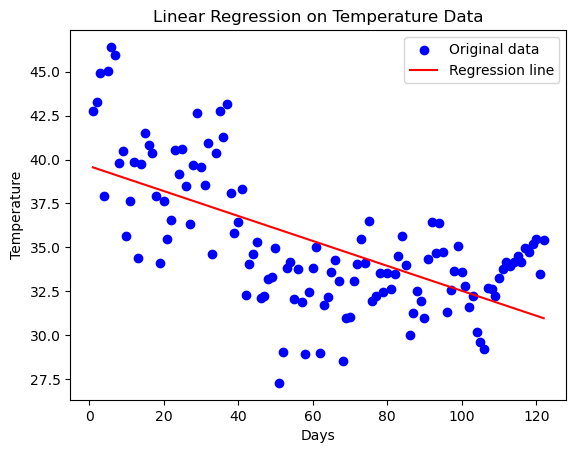

In [119]:
import numpy as np
from numpy.ma import MaskedArray
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a MaskedArray for days from 1 to 122
days = np.ma.masked_array(np.arange(1, 123))

# Assuming tmax_summer is your MaskedArray containing labeled data

# Create a linear regression model
model = LinearRegression()

# Fit the model using days and tmax_summer
model.fit(days.reshape(-1, 1), tmax_summer)

# Predict the labels using the trained model
predictions = model.predict(days.reshape(-1, 1))

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot the original data points
plt.scatter(days, tmax_summer, color='blue', label='Original data')

# Plot the regression line
plt.plot(days, predictions, color='red', label='Regression line')

# Add labels and legend
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Linear Regression on Temperature Data')
plt.legend()

# Show plot
plt.show()


I generated a separate array representing summer days from 1 to 122 and utilized linear regression to model the relationship between the temperature (tmax_summer) and the corresponding days. This approach allowed me to capture the linear trend in temperature changes throughout the summer period. also we observe decreasing in tempratute as we move from june to september. 

In [120]:
# Y = Record avg temp in june,july,august and september
average_tmax = []
average_tmax.append(np.mean(tmax_june))
average_tmax.append(np.mean(tmax_july))
average_tmax.append(np.mean(tmax_august))
average_tmax.append(np.mean(tmax_september))

print(average_tmax)

[39.847733, 34.99079182942708, 32.8696, 33.417927]


average maximum temprature of summar months june,july,august and september.

# TASK 2.3 FOR YEAR 1992

QUES: Plot a boxplot to visualize the distribution of maximum temperatures for each summer month.

In [121]:
tmax_july = np.ma.array(tmax_july)
tmax_july = np.ma.concatenate([tmax_july[:30], tmax_july[31:]])

july month had NAN value(null value) to visualize data using box plot i removed null vlues so that box plot gives meaning full visulization.

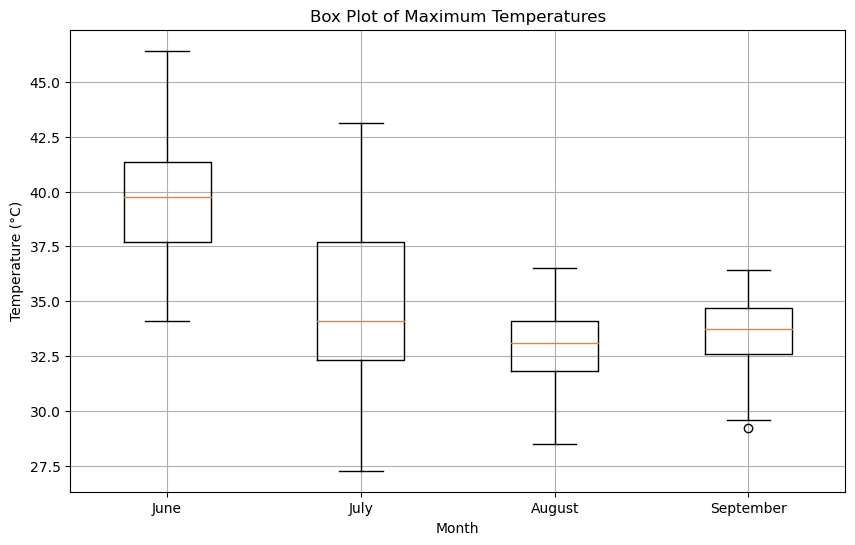

In [122]:
import matplotlib.pyplot as plt

# Create a list of data arrays
data = [tmax_june, tmax_july, tmax_august, tmax_september]

# Create a boxplot for each array
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['June', 'July', 'August', 'September'])
plt.title('Box Plot of Maximum Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Analyzing the box plot reveals that temperature exhibits the more variation in July, which could be attributed to the rainy season. Furthermore, September appears to contain outliers, indicating potential errors in measurement.

# TASK 2.4 FOR YEAR 1992

INSIGHT:
    
1. In summar months 28 days have greater temprature than 38 degree.
2. For year 1992 the average temprature of summer is 35.2615775116219 degree
3. It's evident that the average highest temperatures occur in May, while January and December emerge as the coldest months. 
4. Analyzing the box plot reveals that temperature exhibits the more variation in July, which could be attributed to the rainy season. Furthermore, September appears to contain outliers, indicating potential errors in measurement.
